In [244]:
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.style as style

%matplotlib notebook

In [245]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10',
 '_classic_test']

In [246]:
style.use('seaborn-dark-palette')

## Importing and Cleaning Data

In [247]:
df = pd.read_csv('winlossmargins.csv')

In [248]:
wins = df.iloc[0:3]
losses = df.iloc[4:]

losses = losses.rename(columns = {
    'Winning margins':'Losing margins', 
})

In [249]:
#Storing
#wins.to_csv('winsby.csv')
#losses.to_csv('lossesby.csv')

In [250]:
wins.head()

,Winning margins,1,2,3,4+
0,Home wins,7,1,2,0
1,Away wins,4,3,1,1
2,Home & Away wins,11,4,3,1


In [251]:
losses.head()

,Losing margins,1,2,3,4+
4,Home defeats,0,2,1,0
5,Away defeats,2,4,0,1
6,Home & Away defeats,2,6,1,1


In [252]:
wins = wins.set_index(['Winning margins'])
losses = losses.set_index(['Losing margins'])

## Plotting Data

In [253]:
labels = np.array([1, 2, 3, 4])

off = 0.2

In [254]:
wins.iloc[0]

1     7
2     1
3     2
4+    0
Name: Home wins, dtype: object

<IPython.core.display.Javascript object>


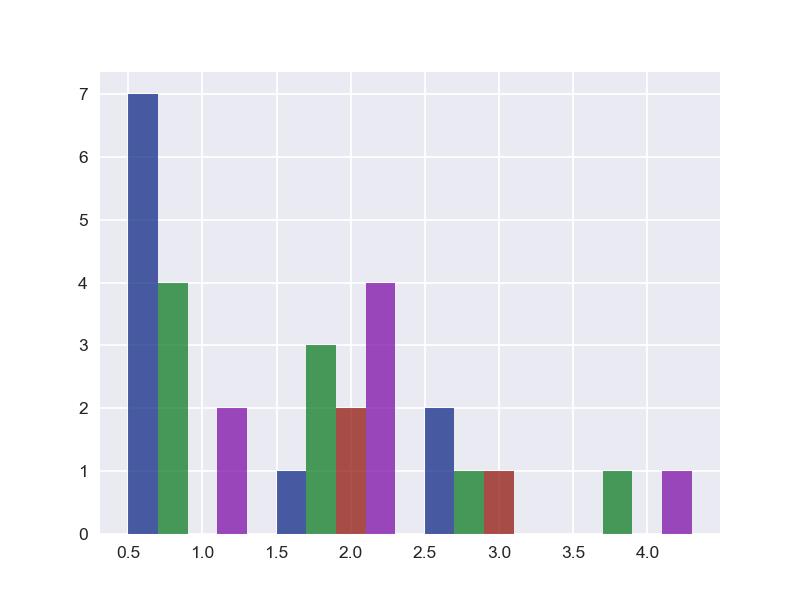

<Container object of 4 artists>

In [255]:
fig = plt.figure()

plt.bar(labels-off*2, wins.iloc[0], width = off, alpha =  0.7)
plt.bar(labels-off, wins.iloc[1], width = off, alpha =  0.7)
plt.bar(labels, losses.iloc[0], width = off, alpha =  0.7)
plt.bar(labels + off, losses.iloc[1], width = off, alpha =  0.7)

### Alternate

In [256]:
w_T = wins.T
l_T = losses.T

del w_T['Home & Away wins']
del l_T['Home & Away defeats']

comb = w_T.join(l_T, how = 'left')

In [257]:
comb = w_T.join(l_T, how = 'left')

In [258]:
comb.head()

,Home wins,Away wins,Home defeats,Away defeats
1,7,4,0,2
2,1,3,2,4
3,2,1,1,0
4+,0,1,0,1


In [259]:
c_labs = np.array([1, 2, 3, 4])

off = 0.2

<IPython.core.display.Javascript object>


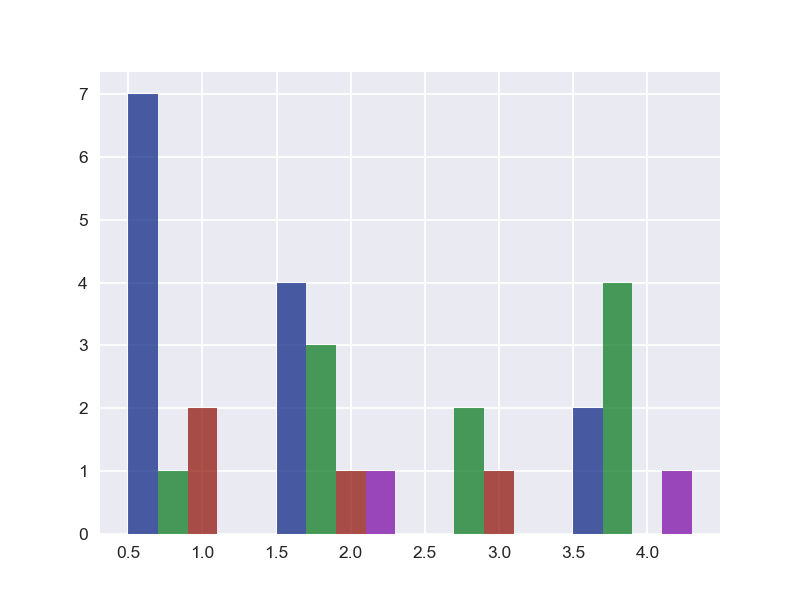

<Container object of 4 artists>

In [260]:
fig = plt.figure()

plt.bar(c_labs-off*2, comb.iloc[0], width = off, alpha =  0.7)
plt.bar(c_labs-off, comb.iloc[1], width = off, alpha =  0.7)
plt.bar(c_labs, comb.iloc[2], width = off, alpha =  0.7)
plt.bar(c_labs + off, comb.iloc[3], width = off, alpha =  0.7)

## Seaborn

In [477]:
w_T = wins.T
l_T = losses.T

del w_T['Home & Away wins']
del l_T['Home & Away defeats']

comb = w_T.join(l_T, how = 'left')
comb.head()

,Home wins,Away wins,Home defeats,Away defeats
1,7,4,0,2
2,1,3,2,4
3,2,1,1,0
4+,0,1,0,1


In [478]:
comb = comb.reset_index()
comb = comb.rename(columns = {'index':'Goals'})

c_T =  comb.T.reset_index()
c_T = c_T.drop([0], axis = 0)
c_T.head()

,index,0,1,2,3
1,Home wins,7,1,2,0
2,Away wins,4,3,1,1
3,Home defeats,0,2,1,0
4,Away defeats,2,4,0,1


In [481]:
labels_change = {
    
    'index':'Margins',
    0: '1 Goal',
    1: '2 Goals',
    3: '4+ Goals',
    2: '3 Goals',
    
}

In [482]:
c_T = c_T.rename(columns = labels_change)


c_T.head()

,Margins,1 Goal,2 Goals,3 Goals,4+ Goals
1,Home wins,7,1,2,0
2,Away wins,4,3,1,1
3,Home defeats,0,2,1,0
4,Away defeats,2,4,0,1


In [483]:
#Need to save and reload if first time
c_T.set_index("Margins").to_csv('wlf.csv')

c_T = pd.read_csv('wlf.csv')


<IPython.core.display.Javascript object>


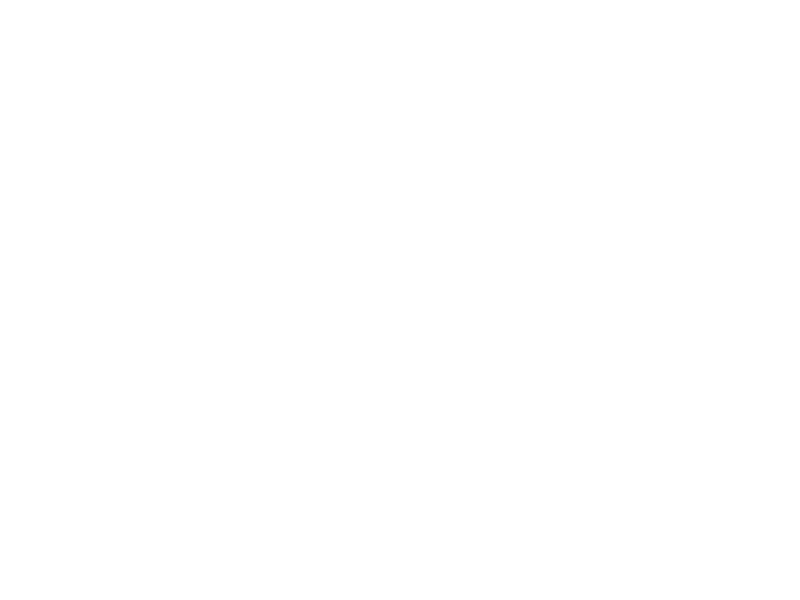

<IPython.core.display.Javascript object>


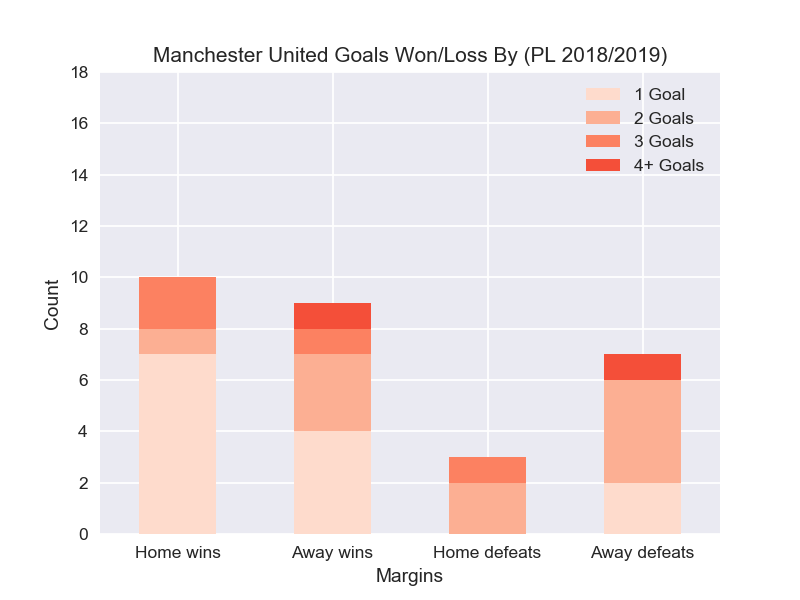

(0, 18)

In [508]:
fig = plt.figure()

sns.set()
sns.set_palette("Reds")

ax = c_T.set_index("Margins").plot(kind = 'bar', stacked = True, rot = 0)

ax.set_ylim((0, 18))

In [539]:
title = 'Manchester United Goals Won/Loss By (PL 2018/2019)'

In [540]:
ax.set_ylabel('Count')
ax.set_title(title)
ax.get_figure().savefig('MU.jpg')

## Comparison to City

In [488]:
city = pd.read_csv('city.csv')

In [489]:
labels_change = {
    
    'Winning margins':'Margins',
    '1': '1 Goal',
    '2': '2 Goals',
    '3': '3 Goals',
    '4+': '4+ Goals',
    
}

city.rename(columns = labels_change, inplace = True)

In [490]:
city

,Margins,1 Goal,2 Goals,3 Goals,4+ Goals
0,Home wins,5,7,2,4
1,Away wins,4,6,2,2
2,Home defeats,1,0,0,0
3,Away defeats,2,1,0,0


In [491]:
city.set_index('Margins', inplace = True)
city.to_csv('cityf.csv')
city.head()

,1 Goal,2 Goals,3 Goals,4+ Goals
Margins,,,,
Home wins,5,7,2,4
Away wins,4,6,2,2
Home defeats,1,0,0,0
Away defeats,2,1,0,0


In [492]:
c = pd.read_csv('cityf.csv')

<IPython.core.display.Javascript object>


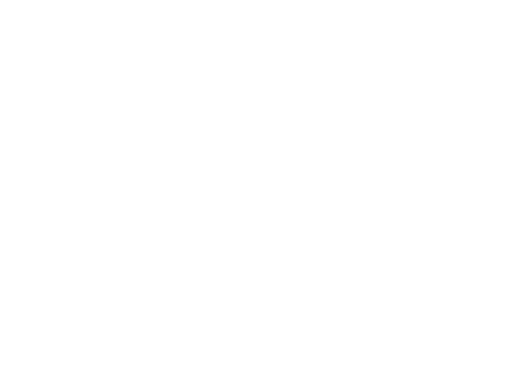

<IPython.core.display.Javascript object>


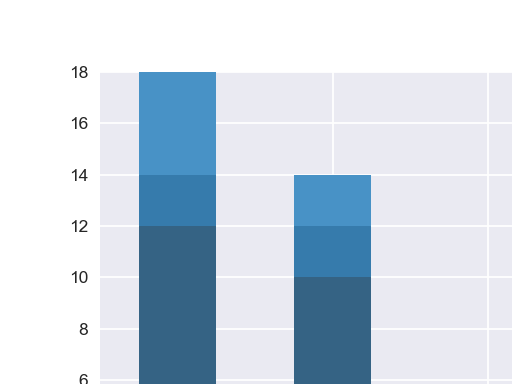

(0, 18)

In [516]:
sns.set_palette('Blues_d')
cax = c.set_index('Margins').plot(kind = 'bar', stacked = True, rot = 0 )

cax.set_ylim((0, 18))

In [535]:
title = 'Manchester City Goals Won/Loss By (PL 2018/2019)'

In [536]:
cax.set_ylabel('Count')
cax.set_title(title)


In [538]:
cax.get_figure().savefig('MC.jpg')